# Chapter 3: Exercise 15

**Import packages**

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize)

## Predicting per capita crime rate from the Boston data set

**Note:** For all variable descriptions please see the Dataset variable descriptions markdown file.

### (a)  Fit a simple linear regression model for each predictor

In [2]:
os.chdir('C:/Users/carma/Documents/GitHub/an-introduction-to-statistical-learning-with-applications-in-python/Datasets')

In [3]:
df = pd.read_csv('Boston.csv').drop(columns=['b'])
y = df['crim']

In [4]:
y.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

**Fit model with zn**

In [5]:
df['zn'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

Text(0, 0.5, 'frequency')

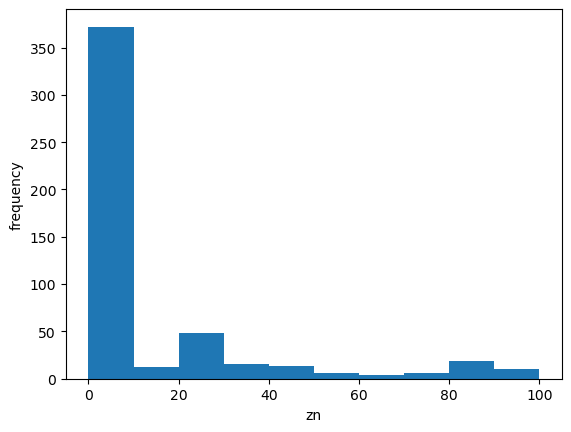

In [6]:
plt.hist(df['zn'], bins=10);
plt.xlabel('zn')
plt.ylabel('frequency')

In [7]:
X = MS(['zn']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


Text(0, 0.5, 'crim')

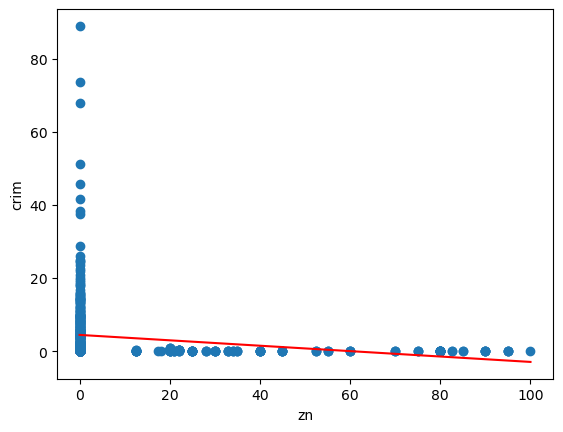

In [8]:
plt.scatter(df['zn'], y)
plt.plot([0,100],[4.4537, 4.4537 - 0.0739*100], 'r')
plt.xlabel('zn')
plt.ylabel('crim')

In [9]:
len(df[df['zn'] == 0])

372

In [10]:
df[['crim', 'zn']][df['crim'] > 1]

,crim,zn
16,1.05393,0.0
20,1.25179,0.0
22,1.23247,0.0
29,1.00245,0.0
30,1.13081,0.0
...,...,...
483,2.81838,0.0
484,2.37857,0.0
485,3.67367,0.0
486,5.69175,0.0


In [11]:
len(df[['crim', 'zn']][df['zn'] == 0])/len(df[['crim', 'zn']])

0.7351778656126482

There is a statistically significant association between 'zn' and 'crim', however from the looks of the scatter plot and estimated regression line, it does not seem to do us much good. There are far too many observations in our data with a zn value of zero, in which we see there is a broad range of crim values. In fact 73% of our data has zn value zero.

**Fit model with indus**

In [12]:
df['indus'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

Text(0, 0.5, 'frequency')

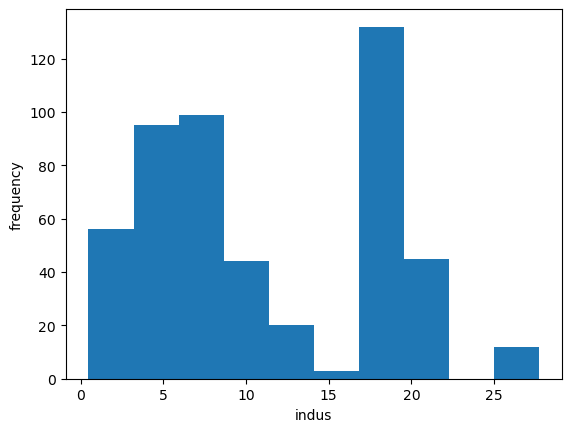

In [13]:
plt.hist(df['indus'], bins=10);
plt.xlabel('indus')
plt.ylabel('frequency')

In [14]:
X = MS(['indus']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


Text(0, 0.5, 'crim')

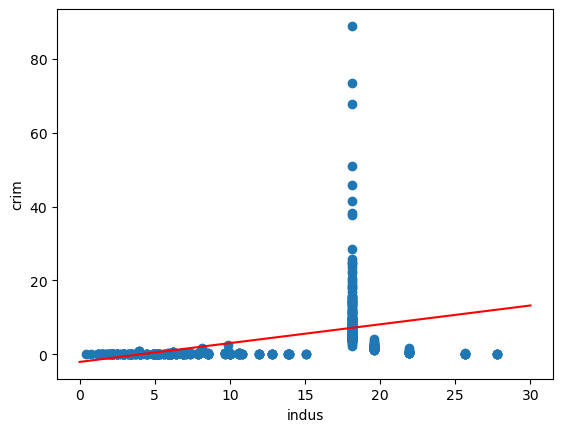

In [15]:
plt.scatter(df['indus'], y)
plt.plot([0,30],[-2.0637, -2.0637 + 0.5098*30], 'r')
plt.xlabel('indus')
plt.ylabel('crim')

In [16]:
df[['crim', 'indus']][df['crim'] > 5].sort_values('crim', ascending=False)

,crim,indus
380,88.97620,18.1
418,73.53410,18.1
405,67.92080,18.1
410,51.13580,18.1
414,45.74610,18.1
...,...,...
433,5.58107,18.1
451,5.44114,18.1
391,5.29305,18.1
358,5.20177,18.1


In [17]:
df[['crim']][df['indus'] == 18.1]

,crim
356,8.98296
357,3.84970
358,5.20177
359,4.26131
360,4.54192
...,...
483,2.81838
484,2.37857
485,3.67367
486,5.69175


In [18]:
df[['crim']][df['indus'] == 18.1].describe()

,crim
count,132.000000
mean,12.759291
std,13.041169
min,2.378570
25%,5.686307
50%,9.084990
75%,14.333700
max,88.976200


In [19]:
y.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [20]:
len(df[['crim']][df['indus'] == 18.1])/len(df[['crim']])

0.2608695652173913

There is a statistically significant association between 'indus' and 'crim', however from the looks of the scatter plot and estimated regression line, it does not seem to do us much good. We make note that in our data set, all neighborhoods which have high crime rate happen to have indus value equal to 18.1, and 26% of the data has this value.

**Fit model with chas**

In [21]:
np.sum(df['chas'] == 1)

35

35 out of the 506 observations bound the Charles River

In [22]:
X = MS(['chas']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


Text(0, 0.5, 'crim')

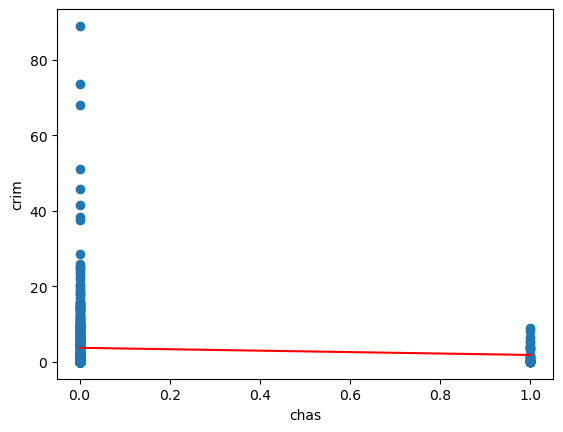

In [23]:
plt.scatter(df['chas'], y)
plt.plot([0,1],[3.7444, 3.7444 - 1.8928*1], 'r')
plt.xlabel('chas')
plt.ylabel('crim')

In [24]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

There is not a statistically significant association between 'chas' and 'crim'. However if we had to guess which neighborhoods may have higher crime rate, we would say ones that do not bound the Charles River. This is clear from the scatter plot.

**Fit model with nox**

In [25]:
df['nox'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64

Text(0, 0.5, 'frequency')

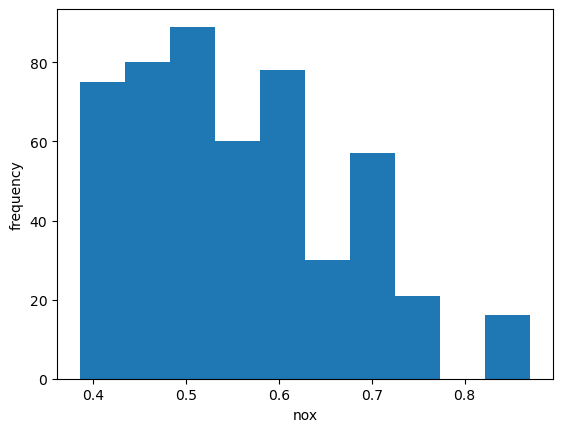

In [26]:
plt.hist(df['nox'], bins=10);
plt.xlabel('nox')
plt.ylabel('frequency')

In [27]:
X = MS(['nox']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-13.7199,1.699,-8.073,0.0
nox,31.2485,2.999,10.419,0.0


Text(0, 0.5, 'crim')

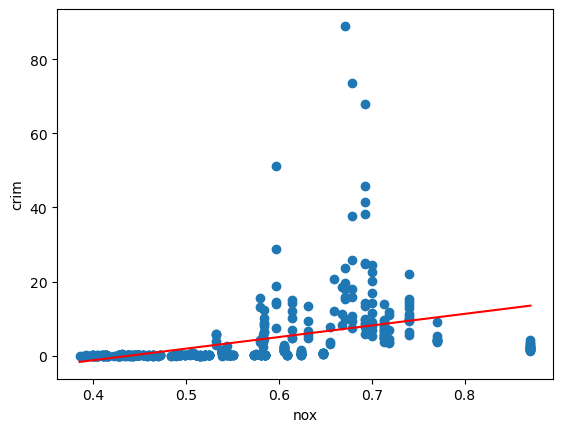

In [28]:
plt.scatter(df['nox'], y)
plt.plot([np.min(df['nox']), np.max(df['nox'])],[-13.7199 + np.min(df['nox'])*31.2485, -13.7199 + 31.2485*np.max(df['nox'])], 'r')
plt.xlabel('nox')
plt.ylabel('crim')

In [29]:
df[['nox']][df['crim'] >= 10].describe()

,nox
count,54.000000
mean,0.670870
std,0.048133
min,0.580000
25%,0.638000
50%,0.679000
75%,0.700000
max,0.740000


There is a statistically significant association between 'nox' and 'crim'. For example we see that all neighborhoods with crime rate greater than or equal to ten have nox value between 0.58 and 0.74. It appears as nox increases so does crime rate.

**Fit model with rm**

In [30]:
df['rm'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: rm, dtype: float64

Text(0, 0.5, 'frequency')

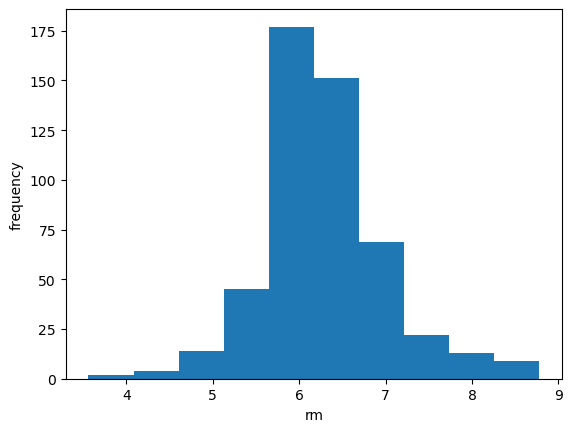

In [31]:
plt.hist(df['rm'], bins=10);
plt.xlabel('rm')
plt.ylabel('frequency')

In [32]:
X = MS(['rm']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,20.4818,3.364,6.088,0.0
rm,-2.6841,0.532,-5.045,0.0


Text(0, 0.5, 'crim')

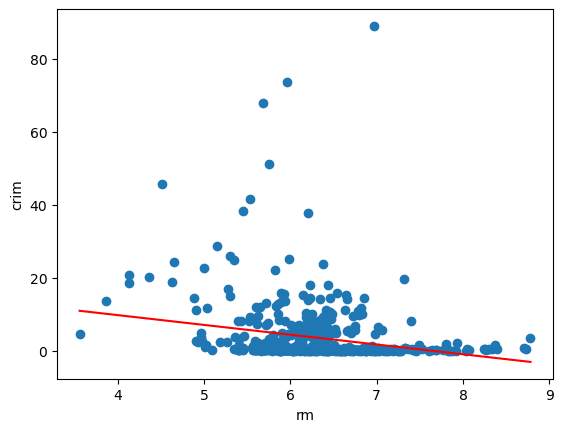

In [33]:
plt.scatter(df['rm'], y)
plt.plot([np.min(df['rm']), np.max(df['rm'])],[20.4818 - 2.6841*np.min(df['rm']), 20.4818 - 2.6841*np.max(df['rm'])], 'r')
plt.xlabel('rm')
plt.ylabel('crim')

There is a statistically significant association between 'rm' and 'crim'. It appears as the average number of rooms per dwelling (rm) increases, crime rate decreases.

**Fit model with age**

In [34]:
var = 'age'

In [35]:
df[var].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

Text(0, 0.5, 'frequency')

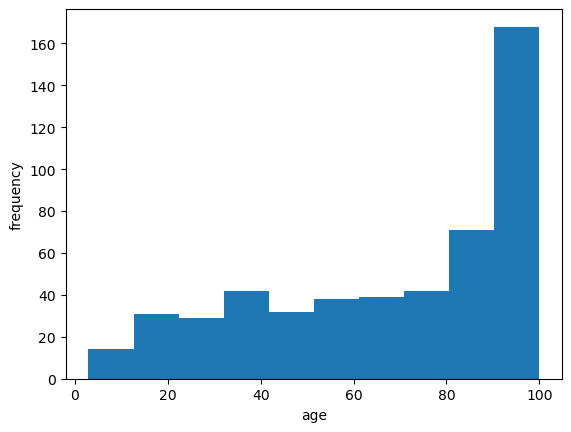

In [36]:
plt.hist(df[var], bins=10);
plt.xlabel(var)
plt.ylabel('frequency')

In [37]:
X = MS([var]).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


In [38]:
intercept = result.params[0]
slope = result.params[1]

Text(0, 0.5, 'crim')

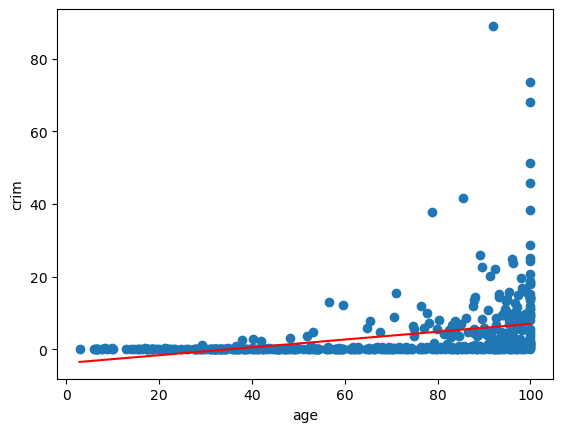

In [39]:
plt.scatter(df[var], y)
plt.plot([np.min(df[var]), np.max(df[var])],[intercept + slope*np.min(df[var]), intercept + slope*np.max(df[var])], 'r')
plt.xlabel(var)
plt.ylabel('crim')

In [40]:
-intercept/slope

35.04999124867442

Note the estimated regression equation is only valid for age values $\approx 35$ or greater. Else our prediction for crime would be negative. Similar domain restrictions should also be placed on our previous estimated regression equations.

There is a statistically significant association between 'age' and 'crim'. It appears as the proportion of owner-occupied units built prior to 1940 increases so does crime.

**Fit model with dis**

In [41]:
var = 'dis'

In [42]:
df[var].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

Text(0, 0.5, 'frequency')

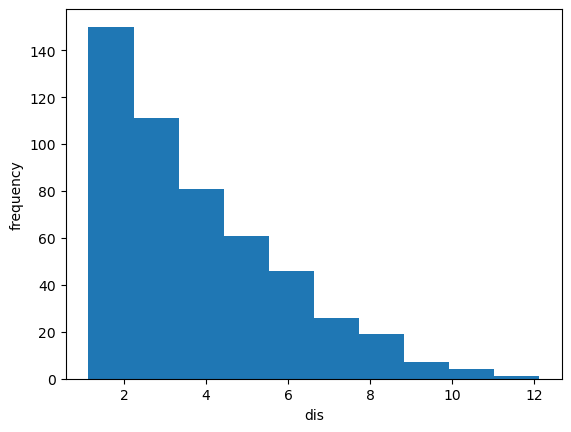

In [43]:
plt.hist(df[var], bins=10);
plt.xlabel(var)
plt.ylabel('frequency')

In [44]:
X = MS([var]).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,9.4993,0.730,13.006,0.0
dis,-1.5509,0.168,-9.213,0.0


In [45]:
intercept = result.params[0]
slope = result.params[1]

Text(0, 0.5, 'crim')

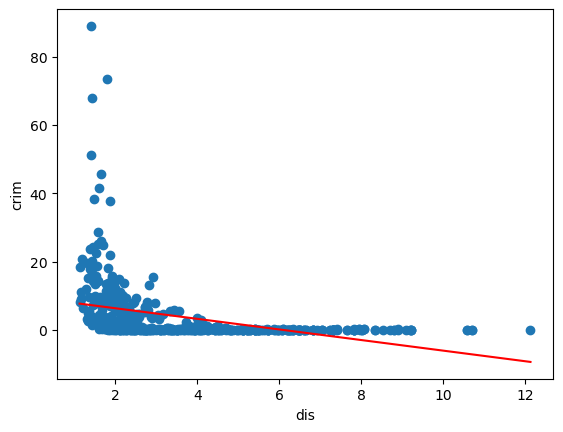

In [46]:
plt.scatter(df[var], y)
plt.plot([np.min(df[var]), np.max(df[var])],[intercept + slope*np.min(df[var]), intercept + slope*np.max(df[var])], 'r')
plt.xlabel(var)
plt.ylabel('crim')

In [47]:
-intercept/slope

6.124992805343686

Note the estimated regression equation is only valid for input values $\approx 6$ or less.

There is a statistically significant association between 'dis' and 'crim'. We can see graphically all neighborhoods with high crime rate happen to have a dis value less than 5.

**Fit model with rad**

In [48]:
var = 'rad'

In [49]:
len(df[var].unique())

9

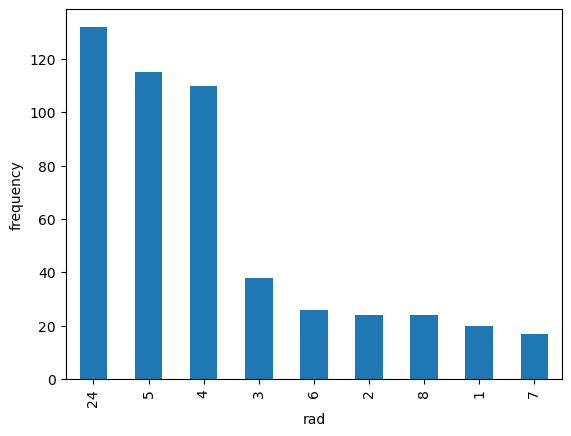

In [50]:
df[var].value_counts().plot.bar();
plt.xlabel(var);
plt.ylabel('frequency');

In [51]:
X = MS([var]).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-2.2872,0.443,-5.157,0.0
rad,0.6179,0.034,17.998,0.0


In [52]:
intercept = result.params[0]
slope = result.params[1]

Text(0, 0.5, 'crim')

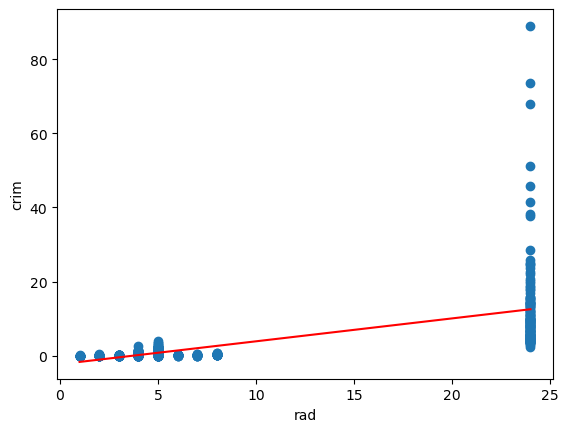

In [53]:
plt.scatter(df[var], y)
plt.plot([np.min(df[var]), np.max(df[var])],[intercept + slope*np.min(df[var]), intercept + slope*np.max(df[var])], 'r')
plt.xlabel(var)
plt.ylabel('crim')

In [54]:
df[var][df['crim'] > 10][:5]

367    24
373    24
374    24
375    24
376    24
Name: rad, dtype: int64

There is a statistically significant association between 'rad' and 'crim'. We can see graphically all neighborhoods with high crime rate happen to have a rad value equal to 24. 24 is also the mode of all rad values.

**Fit model with tax**

In [55]:
var = 'tax'

In [56]:
df[var].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

Text(0, 0.5, 'frequency')

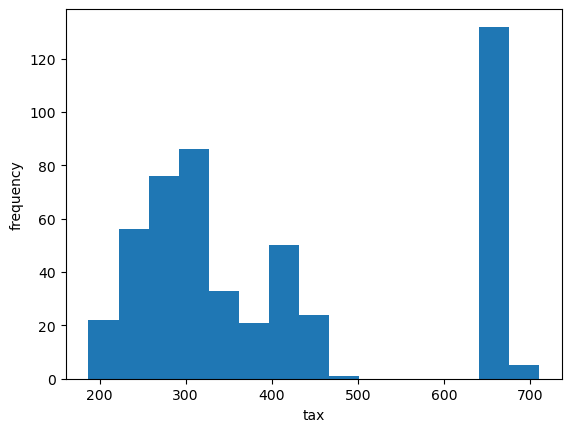

In [60]:
plt.hist(df[var], bins=15);
plt.xlabel(var)
plt.ylabel('frequency')

In [61]:
X = MS([var]).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-8.5284,0.816,-10.454,0.0
tax,0.0297,0.002,16.099,0.0


In [62]:
intercept = result.params[0]
slope = result.params[1]

Text(0, 0.5, 'crim')

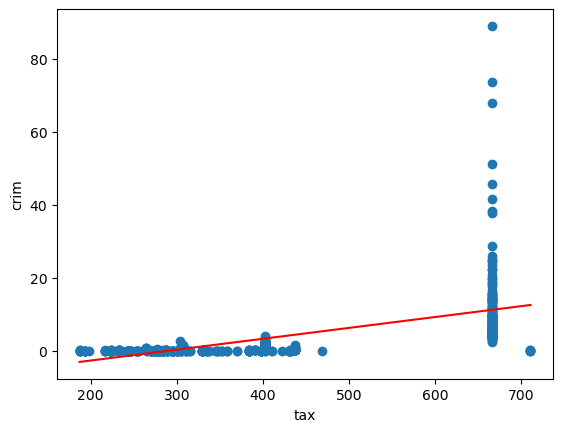

In [63]:
plt.scatter(df[var], y)
plt.plot([np.min(df[var]), np.max(df[var])],[intercept + slope*np.min(df[var]), intercept + slope*np.max(df[var])], 'r')
plt.xlabel(var)
plt.ylabel('crim')

There is a statistically significant association between 'tax' and 'crim'. It appears from the scatter plot that if tax rate is lower than 500 we see relatively low crime.

In [65]:
np.sum(df['tax'] > 600)

137

Notice that for Boston suburbs with tax rate higher than 600 we see a wide spread in crime rates which may make it less valuable as a predictor if tax rate is high.